In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis in this article — a great piece of data journalism that's totally worth reading.

GOAL:
In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

# Title - Analyze Fandango Movie ratings

https://github.com/fivethirtyeight/data/tree/master/fandango

Read in and explore briefly the two data sets (fandango_score_comparison.csv and movie_ratings_16_17.csv) to understand their structure. You can find the documentation of both data sets in the GitHub repositories we linked to above.
Isolate the columns that offer information about Fandango's ratings in separate variables so we have just the data we're interested in more readily available for later use.

For the data set with ratings previous to Hickey's analysis, select the following columns: 'FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'.
For the other data set, select the the following columns: 'movie', 'year', 'fandango'.

Define the population of interest for our goal — remember that our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

By reading the README.md files of the two repositories, figure out whether the two samples are representative for the population we're trying to describe.
Determine whether the sampling is random or not — did all the movies have an equal chance to be included in the two samples?
Useful information can also be found in Hickey's article.
You can acess the two README.md files directly using this link and this link.

In [1]:
import pandas as pd

fandango = pd.read_csv('fandango_score_comparison.csv')
movie_ratings = pd.read_csv('movie_ratings_16_17.csv')

f_cols = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']
m_cols = ['movie', 'year', 'fandango']

fandango_f = fandango[f_cols].copy()
movie_ratings_f = movie_ratings[m_cols].copy()

# figure out whether the two samples are representative for the population we're trying to describe.
# fandango data - contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic 
# User score, and IMDb score, and at least 30 fan reviews on Fandango as of Aug. 24, 2015.
# movie_ratings data - 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017 as of March 22, 2017

The sampling processes were not random, and the resulting samples are very unlikely to be representative of the population
Setbacks like these are common in practical data analysis — you spend time to collect data only to find out that you haven't found exactly what you need. The worst thing you could do is to abandon the research altogether and start looking again for something new and perfect. Instead, it's much better to carry on and try to come up with creative workarounds that are good enough.

At this point, we have at least two alternatives: either we collect new data, either we change the goal of our analysis by placing some limitations on it.

Tweaking our goal seems a much faster choice compared to collecting new data. Also, it's quasi-impossible to collect a new sample previous to Hickey's analysis at this moment in time.

# Change Goal

Change slightly the current goal of our analysis such that:

The population of interest changes and the samples we currently work with become representative.
The new goal is still a fairly good proxy for our initial goal, which was to determine whether there has been any change in Fandango's rating system after Hickey's analysis.
This is not a one-solution-only exercise, so don't be afraid to experiment with new ideas.

In our solution notebook we changed our goal to finding out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. If you've changed to a different goal, and you think it has potential, then you should definitely move forward with that. For learning purposes, however, you should follow along and try to understand our approach as well.

With the new goal, we now have two populations that we want to describe and compare with each other:

All Fandango's ratings for popular movies released in 2015.
All Fandango's ratings for popular movies released in 2016.
The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

# Analyze Datasets

Check if both samples contain popular movies — that is, check whether all (or at least most) sample points are movies with over 30 fan ratings on Fandango's website.
One of the data sets doesn't provide information about the number of fan ratings, and this raises representativity issues once again.
Find a quick way to check whether this sample contains enough popular movies as to be representative.
If you get stuck here, you can always sneak a look at the solution notebook.

In [9]:
# chcek if both data sets have a representative sample of popular moview
fandango_f.sample(10,random_state = 1)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
98,Get Hard (2015),4.0,3.9,5933,0.1
66,The Gift (2015),4.0,3.7,2680,0.3
53,Hot Pursuit (2015),4.0,3.7,2618,0.3
75,San Andreas (2015),4.5,4.3,9749,0.2
121,The Stanford Prison Experiment (2015),4.0,3.9,51,0.1
74,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,0.2
119,Phoenix (2015),3.5,3.4,70,0.1
128,Mission: Impossible â€“ Rogue Nation (2015),4.5,4.4,8357,0.1
44,Kingsman: The Secret Service (2015),4.5,4.2,15205,0.3
58,Seventh Son (2015),3.5,3.2,1213,0.3


In [8]:
movie_ratings_f.sample(10,random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [11]:
# double-check the other data set for popular movies. The documentation states clearly that there're only movies with at 
# least 30 fan ratings
fandango_f['Fandango_votes'].min()

35

# Isolate samples

If you explore the data sets enough, you'll notice that some movies were not released in 2015 and 2016. We need to isolate only the sample points that belong to our populations of interest.
Isolate the movies released in 2015 in a separate data set.
Isolate the movies released in 2016 in another separate data set.
These are the data sets we'll use next to perform our analysis.

In [15]:
fandango_f['Year'] = fandango_f['FILM'].str[-5:-1]
fandango_2015 = fandango_f[fandango_f['Year']=='2015'].copy()
print(len(fandango_2015))
movie_ratings_2016 = movie_ratings_f[movie_ratings['year']==2016].copy()
print(len(movie_ratings_2016))

129
191


Generate two kernel density plots on the same figure for the distribution of movie ratings of each sample. Customize the graph such that:

It has a title with an increased font size.
It has labels for both the x and y-axis.
It has a legend which explains which distribution is for 2015 and which is for 2016.
The x-axis starts at 0 and ends at 5 because movie ratings on Fandango start at 0 and end at 5.
The tick labels of the x-axis are: [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0].
It has the fivethirtyeight style (this is optional). You can change to this style by using plt.style.use('fivethirtyeight'). This line of code must be placed before the code that generates the kernel density plots.
Analyze the two kernel density plots. Try to answer the following questions:

What is the shape of each distribution?
How do their shapes compare?
If their shapes are similar, is there anything that clearly differentiates them?
Can we see any evidence on the graph that suggests that there is indeed a change between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016?
Provided there's a difference, can we tell anything about the direction of the difference? In other words, were movies in 2016 rated lower or higher compared to 2015?

# Comparing Distribution Shapes for 2015 and 2016

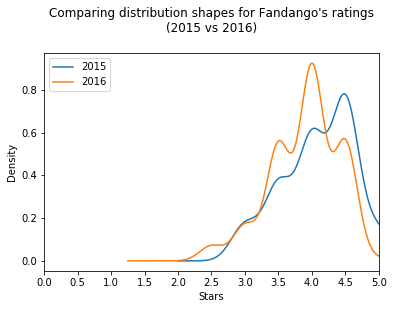

In [21]:
from numpy import arange
import matplotlib.pyplot as plt
%matplotlib inline
fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True)
movie_ratings_2016['fandango'].plot.kde(label = '2016', legend = True)
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",y = 1.07) 
# the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

Two aspects are striking on the figure above:

Both distributions are strongly left skewed.
The 2016 distribution is slightly shifted to the left.
The left skew suggests that movies on Fandango are given mostly high and very high fan ratings. Coupled with the fact that Fandango sells tickets, the high ratings are a bit dubious. It'd be really interesting to investigate this further — ideally in a separate project, since this is quite irrelevant for the current goal of our analysis.

The slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This confirms that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower than in 2015.

# Comparing Relative Frequencies

Examine the frequency distribution tables of the two distributions.

The samples have different number of movies. Does it make sense to compare the two tables using absolute frequencies?
If absolute frequencies are not useful here, would relative frequencies be of more help? If so, what would be better for readability — proportions or percentages?
Analyze the two tables and try to answer the following questions:

Is it still clear that there is a difference between the two distributions?
What can you tell about the direction of the difference just from the tables? Is the direction still that clear anymore?

In [26]:
print('----2015----')
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

----2015----


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [27]:
print('----2016----')
movie_ratings_2016['fandango'].value_counts(normalize = True).sort_index() * 100

----2016----


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies were given a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.

# Determining the Direction of the Change

We'll take a couple of summary statistics (remember the distinction between sample statistics and population parameters) to get a more precise picture about the direction of the difference. We'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

Compute the mean, median, and mode for each distribution.
Compare these metrics and determine what they tell about the direction of the difference.
What's magnitude of the difference? Is there a big difference or just a slight difference?
Generate a grouped bar plot to show comparatively how the mean, median, and mode varied for 2015 and 2016. 

In [28]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = movie_ratings_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = movie_ratings_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = movie_ratings_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


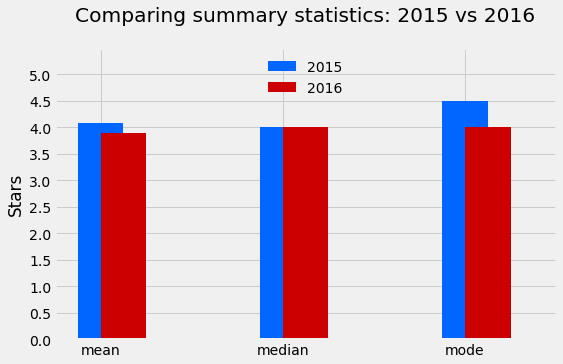

In [29]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25, rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

In [30]:
# The mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean 
# rating in 2015.
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]

# While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the 
# mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 
# 2016 were rated slightly lower than popular movies released in 2015.

0.048426835689519929

# Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.